# Practia uno Tecnicas de apredizage automatico: Analisis de calidad de vino

## Analisis de datos

El primer paso es ver que datos tiene el dataset para ello nos descargamos las librerias necesarias, ucimrepo que contiene el dataset y skit-learn que contiene mucahs herramientas para el entrenamientos de modelos de clasificion y regresion.

In [ ]:
!pip install ucimlrepo
!pip install scikit-learn

Importamos la librerias necesarias:
- numpy: Biblioteca fundamental para el cálculo numérico en Python. Proporciona estructuras de datos eficientes (como arrays) y funciones matemáticas para realizar operaciones numéricas.

- pandas:Herramienta principal para el análisis de datos en Python. Facilita la manipulación y análisis de datos estructurados (como tablas), con funciones para leer, filtrar y transformar datos.

- matplotlib: Biblioteca para crear visualizaciones estáticas, interactivas y animadas en Python. Usada para generar gráficos como líneas, barras, dispersión, etc.

- sklearn: Librería de machine learning que proporciona herramientas para crear, entrenar y evaluar modelos de aprendizaje automático. Incluye algoritmos de regresión, clasificación, clustering, entre otros.

- seaborn: Basada en `matplotlib`, seaborn es una librería de visualización que facilita la creación de gráficos estadísticos atractivos y complejos, con una sintaxis más simple y fácil de usar.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.svm import SVR
from ucimlrepo import fetch_ucirepo
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

En este paso, descargamos el dataset de calidad del vino desde la biblioteca UCI ML Repository.
Luego, lo cargamos en dos DataFrames de pandas: `X` para las características y `y` para la calidad del vino.

In [ ]:
# Descarga del dataset
wine_quality = fetch_ucirepo(id=186)
# Datos brutos en formato Dataframe de pandas
X = wine_quality.data.features
y = wine_quality.data.targets

Antes de realizar cualquier análisis, es fundamental comprender la estructura de los datos.
Imprimimos los metadatos y las variables disponibles para conocer qué información contiene el dataset.

In [ ]:
# Metadatos
print(wine_quality.metadata)
# Información de las variables
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences


A continuación, visualizamos las primeras filas de `X` y `y` para obtener una idea de su contenido.

In [ ]:
print(X.head())
print(y.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
   quali

Generamos un resumen estadístico de las características numéricas del dataset para analizar su distribución.

In [ ]:
print(X.describe())
print(y.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

Verificamos la estructura del dataset, incluyendo los tipos de datos y la presencia de valores nulos.

In [ ]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0  


### Transformación de la variable de calidad

En el dataset, la variable `quality` es una escala numérica.
Primero, identificamos los valores únicos de calidad disponibles.

In [ ]:
#Todos los valores sin repetir de quality
print(y['quality'].unique())

[5 6 7 4 8 3 9]


## Transformación de la variable `quality` para clasificación

En este paso, transformamos la variable `quality` en una variable binaria para convertir el problema en un problema de **clasificación binaria**.

- **Vino de buena calidad (1)**: Si la puntuación de calidad es mayor o igual a 7.
- **Vino de mala calidad (0)**: Si la puntuación de calidad es inferior a 7.

Este proceso es necesario en clasificación porque estamos prediciendo una **categoría** (buena o mala calidad) en lugar de un valor continuo.

### ¿Por qué no se hace en regresión?
En regresión, no transformamos la variable a binaria, ya que el objetivo es predecir un valor continuo (la **puntuación exacta de calidad**), no una categoría.


In [ ]:
# Convertir la calidad en variable categórica para clasificación
y_classification = y.copy()
y_classification["quality"] = y_classification["quality"].apply(lambda q: 1 if q >= 7 else 0)  # Binaria: 1 (bueno) o 0 (malo)
print(y_classification)

      quality
0           0
1           0
2           0
3           0
4           0
...       ...
6492        0
6493        0
6494        0
6495        1
6496        0

[6497 rows x 1 columns]


Visualizamos la cantidades de los vinos de mala y buena calidad que hay

In [ ]:
print(y_classification.value_counts())

quality
0          5220
1          1277
Name: count, dtype: int64


Guardamos los datos en un csv

In [ ]:
# Guardar X en un archivo CSV
X.to_csv('wine_features.csv', index=True)

# Guardar y_classification en un archivo CSV
y_classification.to_csv('wine_quality_classification.csv', index=True)

## Visualización de datos
### Distribución de la calidad del vino
Generamos un gráfico de barras para visualizar la distribución de los valores de `quality` en el dataset.

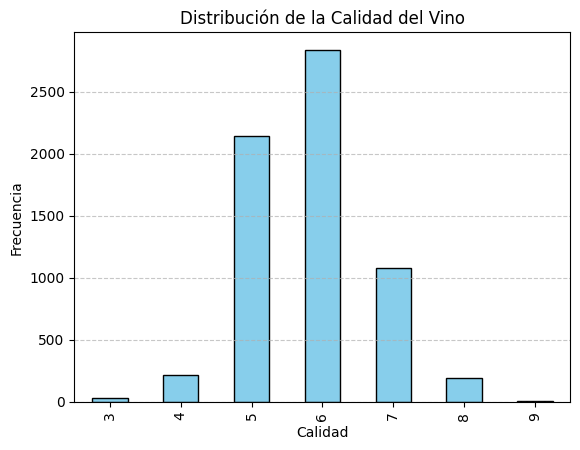

In [ ]:
# Gráfica de distribución de calidad del vino
y['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


La mayoria de mustras tiene una calidad de 6 es decir son regulares

### Matriz de correlación de las características
Calculamos la matriz de correlación para analizar cómo se relacionan las diferentes características entre sí.

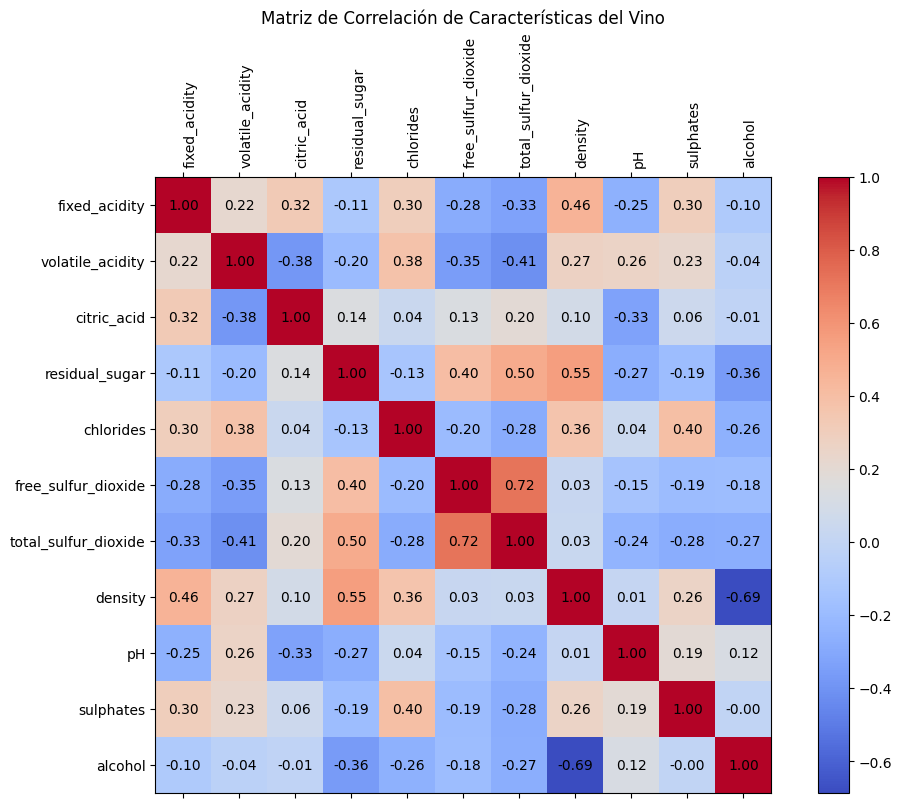

In [ ]:
# Matriz de correlación mejorada
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(12,8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
plt.colorbar(cax)
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90, ha='left')
ax.set_yticklabels(corr_matrix.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Matriz de Correlación de Características del Vino')
plt.show()

Como podemos observar no hay una gran correlacion, ya que el minimo es -0.69 en alcohol - density y el maxiomo es de 0.72 en free_sulfur_dioxide y total_sulfur_dioxide

# Preparacion de datos


## División de los datos en entrenamiento y prueba

Para evaluar correctamente el desempeño de los modelos, es importante dividir los datos en dos conjuntos: uno para **entrenar** el modelo y otro para **evaluarlo**. En nuestro caso dividiremos
los datos en dos conjuntos: uno para el entrenamiento y otro para la prueba, con un **20% de los datos reservados para prueba**. Esto nos permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

In [ ]:
# Dividir los datos en entrenamiento y prueba clasificación
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

In [ ]:
# Dividir los datos en entrenamiento y prueba para regresión
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

## Escalado de los datos

El escalado de los datos es un paso crucial cuando trabajamos con modelos de aprendizaje automático, especialmente para aquellos que son sensibles a la escala de los datos (como la regresión logística, SVM, etc.). Este proceso normaliza las características para que todas tengan un rango similar, lo que mejora la eficiencia y la precisión del modelo.

Para realizarlo usamos StandardScaler para que los valores de las características tengan media 0 y desviación estándar 1.

In [ ]:
# Escalar los datos clasificacion
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

In [ ]:
# Escalar los datos regresion
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

#Clasificación


##Definicion
La **clasificación** es una técnica de aprendizaje supervisado en la que el objetivo es predecir una categoría o clase a partir de un conjunto de características. En este caso, queremos predecir si un vino es de **buena calidad** (valor 1) o **mala calidad** (valor 0), utilizando las características del vino como su contenido de alcohol, acidez, pH, entre otras.

Este es un problema de **clasificación binaria**, donde el modelo debe asignar uno de dos posibles valores a cada ejemplo. Los algoritmos de clasificación aprenden patrones en los datos para hacer predicciones sobre datos nuevos.

### Métricas de Clasificación Usadas

Una vez que los modelos hayan hecho sus predicciones, es necesario evaluar su desempeño. Para ello, utilizaremos diferentes métricas de clasificación, para asi poder comparar los diferentes modelos:
- **accuaracy**: Mide la proporción de predicciones correctas sobre el total de ejemplos.
- **precision**: Mide cuántas de las predicciones positivas fueron realmente positivas.
- **recall**: Mide cuántos de los casos positivos fueron correctamente identificados.
- **f1**: Es la media armónica entre precisión y recall, equilibrando ambas métricas.
- **mactriz de confusion** Representa las predicciones correctas e incorrectas en una tabla.




Definimps

## KNN

**Descripción**: Es un algoritmo basado en la proximidad de los datos. Para clasificar una nueva muestra, busca los **K vecinos más cercanos** en el conjunto de entrenamiento y asigna la etiqueta más común entre ellos.

### Explicación de los Hiperparámetros de KNN
A continuacion explicaremos los hiperparametros que mejor resultados nos ha dado
#### `algorithm='ball_tree'`
- Utiliza una estructura de árbol de búsqueda **Ball Tree**, eficiente para conjuntos de datos grandes.
- Es una mejor opción que la búsqueda por **fuerza bruta** cuando hay muchas características.

#### `leaf_size=10`
- Determina el **tamaño mínimo** de los nodos hoja en la estructura del árbol.
- Afecta la **velocidad de construcción** y **consulta del árbol**.
- Valores pequeños pueden **mejorar la precisión**, pero hacen más lento el modelo.

#### `metric='chebyshev'`
- Usa la **distancia de Chebyshev**, que mide la **distancia máxima** en cualquier dimensión.
- Es útil cuando las características están en **escalas diferentes**.

#### `n_neighbors=9`
- Define que el modelo considerará los **9 vecinos más cercanos** para tomar una decisión.

#### `p=1`
- Controla cómo se mide la distancia. En este caso, usa la **distancia de Manhattan** (suma de diferencias absolutas).
- Si `p=2`, se usaría la **distancia Euclidiana** (raíz cuadrada de la suma de diferencias al cuadrado).

#### `weights='distance'`
- Los vecinos más cercanos tienen **mayor peso** en la decisión.
- Si se usa `'uniform'`, todos los vecinos tendrían **el mismo peso**.


In [ ]:
# Configuracion de los hiperparámetros del modelo
knn_cla = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size = 10, metric= 'chebyshev', n_neighbors = 9,p = 1, weights= 'distance',)


Una vez configurado con la funcion `fit` iniciamos su entrenamiento, y con `predict` realizamos predicciones con los datos de prueba

In [ ]:
# Entrenamiento del modelo
knn_cla.fit(X_train_clf, y_train_clf.values.ravel())
# Predicciones
y_pred_clf = knn_cla.predict(X_test_clf)

Calculamos las metiricas para poder ver el rendimiento del modelo

In [ ]:
# Cálculo de métricas de clasificación
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

In [ ]:
# Impresión de resultados
print(f"Clasificación - Accuracy: {accuracy}")
print(f"Clasificación - Precision: {precision}")
print(f"Clasificación - Recall: {recall}")
print(f"Clasificación - F1-Score: {f1}")
print(f"Clasificación - Matriz de Confusión: \n{conf_matrix}")

Clasificación - Accuracy: 0.8861538461538462
Clasificación - Precision: 0.7795698924731183
Clasificación - Recall: 0.5753968253968254
Clasificación - F1-Score: 0.6621004566210046
Clasificación - Matriz de Confusión: 
[[1007   41]
 [ 107  145]]


Para mejorar la visualizaccion de la matriz de confusión usamos la libreria matplotlib para crear una tabla mas visual.

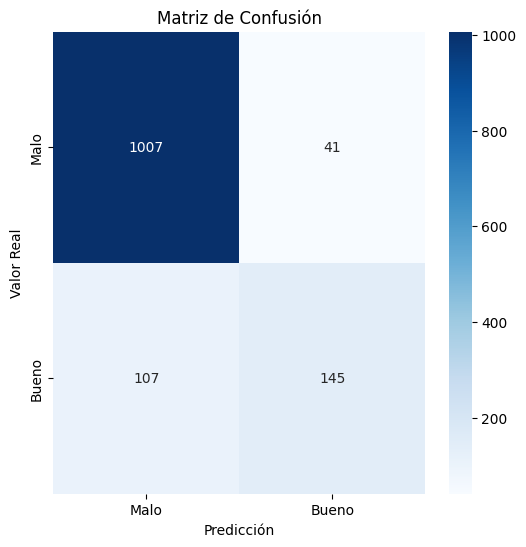

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Malo", "Bueno"], yticklabels=["Malo", "Bueno"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

## Naive Bayes

**Descripción**: Modelo basado en el **Teorema de Bayes**, que asume que las características son **independientes** entre sí (lo cual no siempre es cierto). Funciona bien con datos **categóricos y texto** (por ejemplo, en spam detection).

### Entrenamiento y Predicción con Naive Bayes

En este paso, utilizamos el **clasificador Naive Bayes Gaussiano** (`GaussianNB`) para entrenar el modelo y hacer predicciones sobre los datos de prueba.
**GaussianNB** es un modelo de clasificación basado en el **Teorema de Bayes**, que asume que las características siguen una **distribución normal (Gaussiana)**.




In [ ]:
# Modelo de Clasificación (Naive Bayes)
naive_bayes = GaussianNB()



Una vez inicializado el modelo con la funcion fit iniciamos su entrenamiento, y con predict realizamos predicciones con los datos de prueba

In [ ]:
# Entrenamiento del modelo
naive_bayes.fit(X_train_clf, y_train_clf.values.ravel())
# Predicciones
y_pred_clf = naive_bayes.predict(X_test_clf)

Calculamos las metricas para ver el desmpeño que ha tenido el modelo


In [ ]:
# Cálculo de métricas de clasificación
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

In [ ]:
# Impresión de resultados
print(f"Naive Bayes - Accuracy: {accuracy}")
print(f"Naive Bayes - Precision: {precision}")
print(f"Naive Bayes - Recall: {recall}")
print(f"Naive Bayes - F1-Score: {f1}")
print(f"Naive Bayes - Matriz de Confusión: \n{conf_matrix}")

Naive Bayes - Accuracy: 0.7607692307692308
Naive Bayes - Precision: 0.42297650130548303
Naive Bayes - Recall: 0.6428571428571429
Naive Bayes - F1-Score: 0.510236220472441
Naive Bayes - Matriz de Confusión: 
[[827 221]
 [ 90 162]]


Para mejorar la visualizaccion de la matriz de confusión usamos la libreria matplotlib para crear una tabla mas visual.

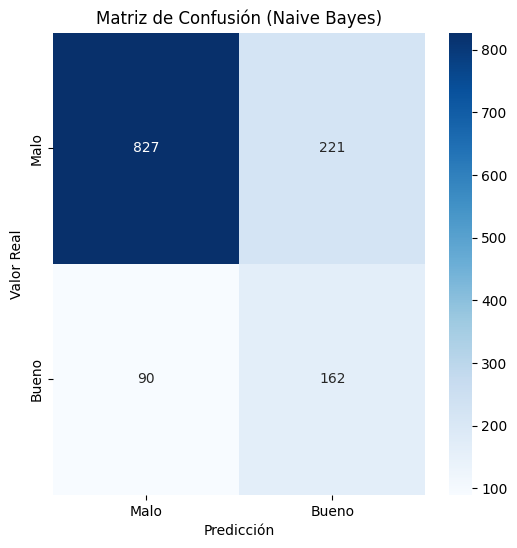

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Malo", "Bueno"], yticklabels=["Malo", "Bueno"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión (Naive Bayes)")
plt.show()

## Arbol de decisión

**Descripción**: Modelo basado en una estructura de árbol donde cada nodo representa una decisión basada en una característica. Se realizan divisiones sucesivas en los datos hasta llegar a una predicción. Funciona bien con datos mixtos (categóricos y numéricos).

### Hiperparamtros del Árbol de Decisión
Los hiperparamtros que mejores resultaros mostraron fueron:
- **max_depth=20**: Define la profundidad máxima del árbol. Limita la complejidad para evitar sobreajuste.
- **min_samples_split=5**: Número mínimo de muestras necesarias para dividir un nodo. Previene divisiones demasiado específicas.
- **min_samples_leaf=2**: Número mínimo de muestras en una hoja final. Ayuda a evitar hojas con pocos datos.
- **ccp_alpha=0.05**: Parámetro para la poda del árbol. Controla la complejidad y reduce el sobreajuste.
- **random_state=42**: Establece la semilla para la generación de números aleatorios, asegurando reproducibilidad.
- **criterion='gini'**: Métrica utilizada para evaluar la impureza de los nodos. `Gini` mide la homogeneidad de las clases.
- **class_weight='balanced'**: Ajusta los pesos para clases desbalanceadas, favoreciendo la clase minoritaria.


In [ ]:
# Crear el modelo de Árbol de Decisión para clasificación
tree_classifier = DecisionTreeClassifier(
    max_depth=20,              # Profundidad máxima del árbol
    min_samples_split=5,       # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,        # Mínimo de muestras en una hoja final
    ccp_alpha=0.05,            # Parámetro de poda
    random_state=42,
    criterion='gini',
    class_weight='balanced'   # Ajuste para clases desbalanceadas
)


Una vez configurado con la funcion `fit` iniciamos su entrenamiento, y con `predict` realizamos predicciones con los datos de prueba

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
tree_classifier.fit(X_train_clf, y_train_clf)

# Realizar las predicciones
y_pred_clf = tree_classifier.predict(X_test_clf)

El uso de `average="binary"` es necesario para indicar que la clasificación es binaria, es decir, solo hay dos clases posibles (buena y mala calidad del vino). Esto asegura que las métricas se calculen correctamente para este tipo de problemas.

In [ ]:
# Cálculo de métricas de clasificación
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average="binary")
recall = recall_score(y_test_clf, y_pred_clf, average="binary")
f1 = f1_score(y_test_clf, y_pred_clf, average="binary")
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

# Impresión de resultados
print(f"Clasificación - Accuracy: {accuracy:.4f}")
print(f"Clasificación - Precision: {precision:.4f}")
print(f"Clasificación - Recall: {recall:.4f}")
print(f"Clasificación - F1-Score: {f1:.4f}")
print("Clasificación - Matriz de Confusión:")
print(conf_matrix)

Clasificación - Accuracy: 0.6885
Clasificación - Precision: 0.3586
Clasificación - Recall: 0.7698
Clasificación - F1-Score: 0.4893
Clasificación - Matriz de Confusión:
[[701 347]
 [ 58 194]]


Para mejorar la visualizaccion de la matriz de confusión usamos la libreria matplotlib para crear una tabla mas visual.

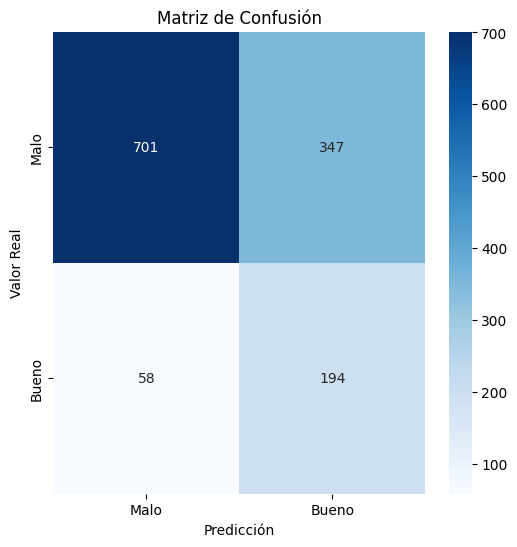

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Malo", "Bueno"], yticklabels=["Malo", "Bueno"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

## Random Forest

**Descripción**: Es un conjunto de múltiples **árboles de decisión** donde cada árbol se entrena con una muestra diferente del dataset. La predicción final se obtiene por **votación mayoritaria**.
   - **Ventajas**:
     - **Reduce el sobreajuste** en comparación con un solo árbol de decisión.
     - Funciona bien en datos con **muchas variables**.

### Hiperparámetros del Random Forest
Los hiperparametros que dieron mejor resultados fueron:
- **n_estimators=100**: Número de árboles en el bosque. A mayor número de árboles, más robusto será el modelo, pero con mayor coste computacional.
- **max_depth=20**: Profundidad máxima de cada árbol. Controla la complejidad del modelo y previene el sobreajuste.
- **min_samples_split=5**: Número mínimo de muestras requeridas para dividir un nodo. Previene divisiones en nodos demasiado pequeños.
- **min_samples_leaf=2**: Número mínimo de muestras necesarias en una hoja final. Ayuda a evitar sobreajuste en nodos muy específicos.
- **random_state=42**: Establece la semilla para la generación de números aleatorios, lo que permite reproducir los mismos resultados.
- **max_features='log2'**: Número máximo de características a considerar en cada división. `log2` significa que se usará el logaritmo en base 2 del número total de características.
- **class_weight='balanced'**: Ajuste de los pesos para clases desbalanceadas. Asigna un mayor peso a las clases menos representadas.


In [ ]:
# Crear el modelo de Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Número de árboles en el bosque
    max_depth=20,      # Profundidad máxima del árbol
    min_samples_split=5,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,   # Mínimo de muestras en una hoja final
    random_state=42,
     max_features='log2',
    class_weight='balanced'
)

# Entrenar el modelo
rf_classifier.fit(X_train_clf, y_train_clf)

# Realizar las predicciones
y_pred_clf = rf_classifier.predict(X_test_clf)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### Cálculo de Métricas de Clasificación

Una vez que el modelo ha hecho sus predicciones, es necesario evaluar su desempeño. Para ello, utilizamos diferentes métricas de clasificación:
- **accuaracy**: Mide la proporción de predicciones correctas sobre el total de ejemplos.
- **precision**: Mide cuántas de las predicciones positivas fueron realmente positivas.
- **recall**: Mide cuántos de los casos positivos fueron correctamente identificados.
- **f1**: Es la media armónica entre precisión y recall, equilibrando ambas métricas.
- **mactriz de confusion** Representa las predicciones correctas e incorrectas en una tabla.

In [ ]:
# Cálculo de métricas de clasificación
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average="binary")
recall = recall_score(y_test_clf, y_pred_clf, average="binary")
f1 = f1_score(y_test_clf, y_pred_clf, average="binary")
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

# Impresión de resultados
print(f"Clasificación - Accuracy: {accuracy:.4f}")
print(f"Clasificación - Precision: {precision:.4f}")
print(f"Clasificación - Recall: {recall:.4f}")
print(f"Clasificación - F1-Score: {f1:.4f}")
print("Clasificación - Matriz de Confusión:")
print(conf_matrix)

Clasificación - Accuracy: 0.8923
Clasificación - Precision: 0.7642
Clasificación - Recall: 0.6429
Clasificación - F1-Score: 0.6983
Clasificación - Matriz de Confusión:
[[998  50]
 [ 90 162]]


Guarmos los resultados para compararlos en un futuro


In [ ]:
# Resultados de Random Forest (Clasificación)
rf_results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest (Clasificación)': [accuracy, precision, recall, f1]
}

Mostramos la matriz de confusión con mejor visualizción

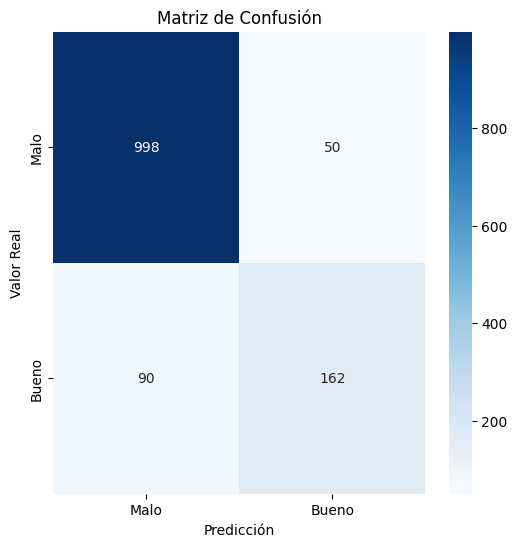

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Malo", "Bueno"], yticklabels=["Malo", "Bueno"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

## SVM

**Descripción**: Es un modelo que encuentra un **hiperplano óptimo** para separar las clases en el espacio de características. Puede utilizar **kernels** para manejar relaciones no lineales. Funciona bien en problemas de **alta dimensión** y es robusto frente a **valores atípicos** y datos ruidosos.

El método `.ravel()` convierte las etiquetas `y_train_clf` y `y_test_clf` en vectores unidimensionales, necesarios para que los modelos de Machine Learning, como SVM, puedan procesarlas correctamente. Este paso asegura que las etiquetas estén en la forma esperada por los clasificadores.


In [ ]:
# Asegurarse de que y_train_clf y y_test_clf estén en forma de vector unidimensional
y_train_clf = y_train_clf.to_numpy().ravel()
y_test_clf = y_test_clf.to_numpy().ravel()


## Hiperparametros
Los hiperparametros utilizados con mejores resultados probados son:

- `C=0.6`: Controla el margen de error. Un valor más bajo permite más errores, mientras que un valor más alto busca una menor tasa de error, pero puede sobreajustarse.
- `kernel='rbf'`: Define el tipo de kernel. "rbf" (Radial Basis Function) es comúnmente utilizado para problemas no lineales.
- `gamma='auto'`: Establece cómo se calcula la influencia de un solo punto de datos. "auto" hace que `gamma` sea 1 dividido por el número de características.
- `probability=True`: Habilita la estimación de probabilidades, útil para obtener la probabilidad de pertenencia a cada clase.

In [ ]:
# Crear el modelo SVM de clasificación
svm_cla = SVC(C=0.6, kernel='rbf', gamma='auto', probability=True)


Una vez configurado con la funcion `fit` iniciamos su entrenamiento, y con `predict` realizamos predicciones con los datos de prueba

In [ ]:
# Entrenar el modelo
svm_cla.fit(X_train_clf, y_train_clf)
# Realizar las predicciones
y_pred_clf = svm_cla.predict(X_test_clf)

Una vez que el modelo ha hecho sus predicciones, es necesario evaluar su desempeño.

In [ ]:
# Cálculo de métricas de clasificación
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

In [ ]:
# Impresión de resultados
print(f"Clasificación - Accuracy: {accuracy}")
print(f"Clasificación - Precision: {precision}")
print(f"Clasificación - Recall: {recall}")
print(f"Clasificación - F1-Score: {f1}")
print(f"Clasificación - Matriz de Confusión: \n{conf_matrix}")

Clasificación - Accuracy: 0.8338461538461538
Clasificación - Precision: 0.7045454545454546
Clasificación - Recall: 0.24603174603174602
Clasificación - F1-Score: 0.36470588235294116
Clasificación - Matriz de Confusión: 
[[1022   26]
 [ 190   62]]


Para mejorar la visualizaccion de la matriz de confusión usamos la libreria matplotlib para crear una tabla mas visual.

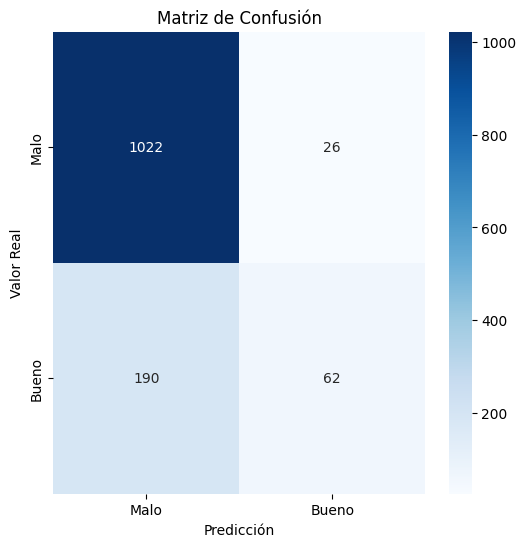

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Malo", "Bueno"], yticklabels=["Malo", "Bueno"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

A continuación calculamos la curva ROC de los diferentes modelos para ver el rendimiento que han tenido en la clasificación. Esto nos permitirá comparar visualmente cómo se comportan los modelos en cuanto a la tasa de verdaderos positivos y falsos positivos para diferentes umbrales de decisión, y así identificar cuál tiene el mejor rendimiento global. También calcularemos el área bajo la curva (AUC) para cuantificar el desempeño general de cada modelo.

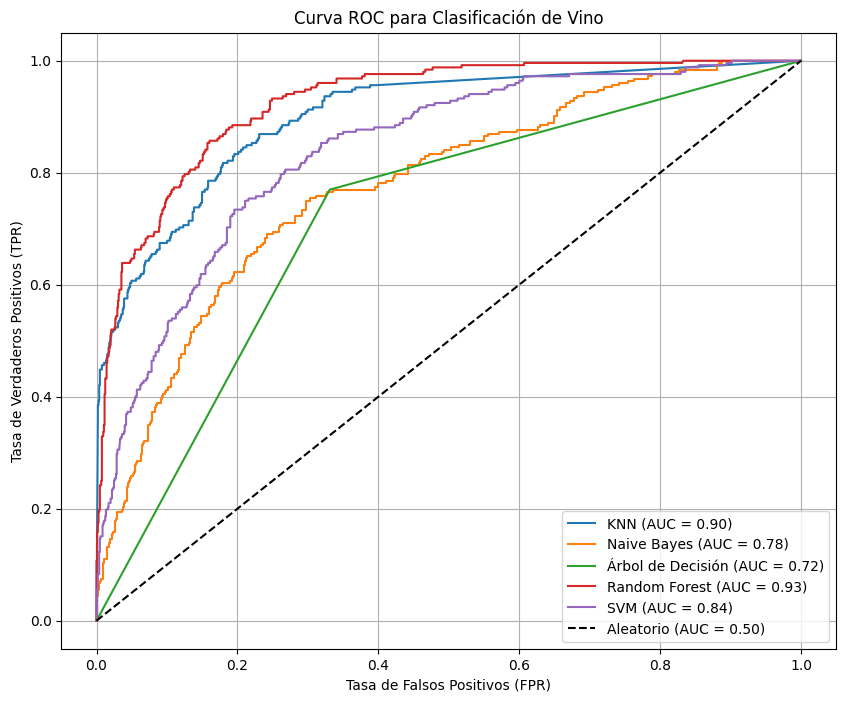

In [ ]:
# Modelos
models = {
    "KNN": knn_cla,
    "Naive Bayes": naive_bayes,
    "Árbol de Decisión": tree_classifier,
    "Random Forest": rf_classifier,
    "SVM": svm_cla
}

# Graficar las curvas ROC para todos los modelos
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Obtener las probabilidades de las clases positivas
    y_prob = model.predict_proba(X_test_clf)[:, 1]  # Probabilidades para la clase positiva

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test_clf, y_prob)

    # Calcular el área bajo la curva (AUC)
    auc_score = auc(fpr, tpr)

    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Graficar la línea de referencia (sin discriminación)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.50)')

# Detalles de la gráfica
plt.title('Curva ROC para Clasificación de Vino')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)

# Mostrar la gráfica
plt.show()


## Conclusión
Comparando las metricas y el rendimiento podemos observar que el modelo Random forest a mostrado los mejores resultados. Esto deve a varios motivos:
1. **Robustez y precisión**
   - **Random Forest** es un conjunto de árboles de decisión que trabajan en conjunto para hacer predicciones más precisas. A diferencia de un solo árbol de decisión, **Random Forest** promedia las predicciones de múltiples árboles, lo que reduce el riesgo de sobreajuste y mejora la precisión.
   - En este dataset de vinos, donde existen muchas interacciones complejas entre las características (como el contenido de alcohol, la acidez y otros factores), **Random Forest** es capaz de capturar estas interacciones de manera efectiva sin perder precisión.

2. **Manejo de datos no lineales**
   - **Random Forest** es especialmente útil para datasets con relaciones no lineales entre las características, como en este caso, ya que las características del vino no siguen una relación lineal clara con la calidad del vino. Los árboles de decisión en **Random Forest** pueden dividir los datos en segmentos que capturan las complejidades no lineales.

3. **Poco sobreajuste**
   - Al ser un modelo basado en múltiples árboles, **Random Forest** tiene una fuerte capacidad de generalización, es decir, tiene menos probabilidades de sobreajustarse a los datos de entrenamiento en comparación con un solo árbol de decisión. Esto es crucial, ya que garantiza que el modelo no solo se adapte bien a los datos de entrenamiento, sino también a los datos de prueba, proporcionando un buen rendimiento en datos nuevos.

4. **Robustez ante características irrelevantes**
   - En un dataset con muchas características, como el de vinos, algunas de las características pueden ser menos relevantes para la predicción de la calidad. **Random Forest** es capaz de manejar características irrelevantes mejor que muchos otros modelos, como  **KNN**, que pueden verse influenciados por características que no aportan mucho a la clasificación.


# Regresión

## Definición
La **regresión** es una técnica de aprendizaje supervisado que se utiliza para predecir un valor numérico en lugar de una categoría. En este caso, en lugar de clasificar los vinos como "buenos" o "malos", intentamos predecir la **calidad exacta** de un vino en función de sus características.

A diferencia de la clasificación, donde la salida es una etiqueta discreta (por ejemplo, 0 o 1), la regresión trabaja con valores continuos. Esto es útil cuando queremos entender no solo si un vino es bueno o malo, sino también qué tan buena o mala es su calidad en una escala más detallada.

### Métricas de Regresión Usadas

Al evaluar los modelos de regresión, es importante analizar diferentes métricas que nos ayuden a comprender el rendimiento del modelo. Las siguientes métricas son las que se utilizan para evaluar y comparar los modelos:

- **MAE (Error Absoluto Medio)**: Mide la media de las diferencias absolutas entre las predicciones y los valores reales, proporcionando una medida directa del error promedio.
  
- **MSE (Error Cuadrático Medio)**: Calcula la media de los errores al cuadrado, penalizando más los errores grandes. Ayuda a identificar modelos que tengan grandes errores en sus predicciones.
  
- **RMSE (Raíz del Error Cuadrático Medio)**: Es la raíz cuadrada del **MSE** y devuelve el error en las mismas unidades que los datos, lo que facilita su interpretación.
  
- **R² (Coeficiente de Determinación)**: Mide la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. Un valor cercano a 1 indica un buen ajuste del modelo.
  
- **MedAE (Error Absoluto Mediano)**: Representa la mediana de los errores absolutos y es menos sensible a los valores atípicos que el MAE.
  
- **MAPE (Error Porcentual Absoluto Medio)**: Calcula el error porcentual medio de las predicciones, lo cual es útil para comparar el rendimiento entre modelos en diferentes escalas de datos.
  
- **Correlación de Pearson**: Mide la fuerza y la dirección de la relación lineal entre las predicciones y los valores reales. Un valor cercano a 1 indica una fuerte relación positiva.




## KNN para Regresión

El algoritmo **K-Nearest Neighbors (KNN)** también se aplica en problemas de regresión. A diferencia de la clasificación, donde el modelo predice categorías, en regresión predice valores continuos. Para predecir el valor de una nueva instancia, KNN calcula el promedio (o la mediana) de los valores de salida de los **k** vecinos más cercanos a esa instancia. KNN es útil cuando no se desea un modelo paramétrico y se busca una solución no lineal.


### Hiperparámetros del Modelo KNN para Regresión
Los hiperparámetos con mejores resultados fueron:
- **n_neighbors=10**:
  Este hiperparámetro define el número de vecinos más cercanos que se considerarán para predecir el valor de la variable objetivo.

- **weights="distance"**:
  Este hiperparámetro especifica cómo se ponderan los vecinos. Cuando se establece como "distance", los vecinos más cercanos tienen más peso en la predicción, es decir, su influencia será proporcional a la inversa de su distancia.

- **metric="Euclidean"**:
  `Euclidean`es la distancia Euclidiana, que se calcula como la raíz cuadrada de la suma de las diferencias cuadradas entre las coordenadas de los puntos. Es la distancia más comúnmente utilizada en el espacio Euclidiano, y en muchos casos, da buenos resultados para la clasificación y regresión en KNN.


In [ ]:
# Modelo de Regresión (KNN)
knn_regressor = KNeighborsRegressor(n_neighbors=10,weights="distance",metric="euclidean")


Una vez configurado con la funcion `fit` iniciamos su entrenamiento, y con `predict` realizamos predicciones con los datos de prueba.

In [ ]:
# Entranmiento
knn_regressor.fit(X_train_reg, y_train_reg)
# Predicción
y_pred_reg = knn_regressor.predict(X_test_reg)

Caluclamos las metricas

In [ ]:

# Cálculo de métricas
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)**0.5  # Raíz cuadrada del MSE
r2 = r2_score(y_test_reg, y_pred_reg)
medae = median_absolute_error(y_test_reg, y_pred_reg)
mape = (abs((y_test_reg - y_pred_reg) / y_test_reg)).mean() * 100  # Evita si hay valores cercanos a 0
correlation = np.corrcoef(y_test_reg.values.ravel(), y_pred_reg.ravel())[0, 1]

# Impresión de resultados
print(f"Regresión - MAE: {mae}")
print(f"Regresión - MSE: {mse}")
print(f"Regresión - RMSE: {rmse}")
print(f"Regresión - R²: {r2}")
print(f"Regresión - MedAE: {medae}")
print(f"Regresión - MAPE: {mape}%")
print(f"Regresión - Correlación de Pearson: {correlation}")




Regresión - MAE: 0.4026627003384012
Regresión - MSE: 0.37707273738152297
Regresión - RMSE: 0.6140624865447514
Regresión - R²: 0.4894395789470015
Regresión - MedAE: 0.2719304798910436
Regresión - MAPE: quality    7.297013
dtype: float64%
Regresión - Correlación de Pearson: 0.7013877910453442


Guardamos los resultados en una lista para futuras comparaciones

In [ ]:
mae_array=[]
mae_array.append(mae)
mse_array=[]
mse_array.append(mse)
rmse_array=[]
rmse_array.append(rmse)
r2_array=[]
r2_array.append(r2)

# Resultados de KNN (Regresión)
knn_results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'KNN (Regresión)': [mae, mse, rmse, r2]
}

#### Interpretación de resultados del Modelo de Regresión KNN





A continuación, se presentan las métricas obtenidas al evaluar el rendimiento del modelo de regresión KNN (K-Nearest Neighbors):

##### 1. **MAE (Mean Absolute Error) = 0.4027**
El valor **0.4027** indica que, en promedio, el modelo comete un error de **0.4027** unidades al predecir los valores de la variable objetivo. Cuanto más bajo sea este valor, mejor será la precisión del modelo.

##### 2. **MSE (Mean Squared Error) = 0.3771**
El valor **0.3771** indica que, en promedio, el modelo tiene un error cuadrático de **0.3771**. Al igual que el MAE, cuanto menor sea este valor, mejor será el modelo.

##### 3. **RMSE (Root Mean Squared Error) = 0.6141**
El valor **0.6141** indica que el error típico del modelo es **0.6141** unidades. Este valor refleja la magnitud de los errores cometidos por el modelo.

##### 4. **R² (R-Squared) = 0.4894**
El valor **0.4894** sugiere que el modelo explica aproximadamente el **48.94%** de la variabilidad en los datos. Esto indica un ajuste moderado.

##### 5. **MedAE (Median Absolute Error) = 0.2719**
El valor **0.2719** sugiere que la mediana de los errores es relativamente baja, lo que indica que muchos de los errores están cerca de **0**.

##### 6. **MAPE (Mean Absolute Percentage Error) = 7.2970%**
El valor **7.2970%** indica que, en promedio, las predicciones del modelo se desvían del valor real en un **7.297%**. Este es un buen valor si se busca que el modelo sea preciso en porcentaje.

##### 7. **Correlación de Pearson = 0.7014**
El valor **0.7014** indica una correlación moderada a fuerte entre las predicciones y los valores reales, lo que sugiere que el modelo tiene una buena capacidad para predecir las tendencias generales de los datos.

Mostramos una  grafica que nos muestra como se ha distribuido el error

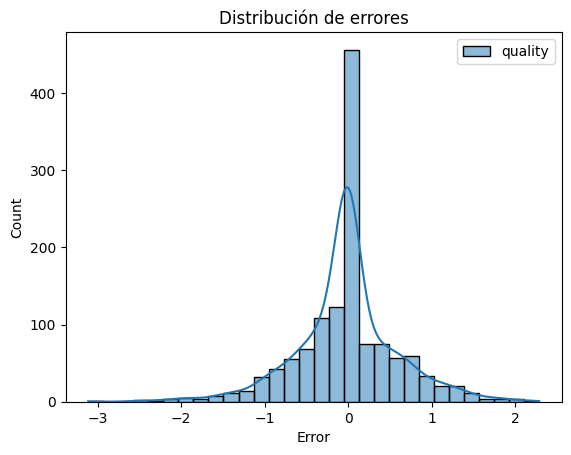

In [ ]:
errors = y_test_reg - y_pred_reg
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Error")
plt.title("Distribución de errores")
plt.show()


Como podemos apreciar la mayoria esta cerca de 0

## SVR

El **SVR** (Support Vector Regression) es una variante de las Máquinas de Vectores de Soporte (SVM) aplicada a problemas de regresión. En lugar de clasificar los datos, el objetivo es ajustar una función que prediga valores continuos. SVR busca una función que esté dentro de un margen de error **ε** con respecto a los valores reales, mientras minimiza el número de puntos fuera de ese margen.

En **SVR** (Support Vector Regression), **Arbol de decision** y **Random Forest**, la variable objetivo `y` debe estar en forma de un vector unidimensional. Sin esta conversión, algunas implementaciones de scikit-learn pueden generar errores.

In [ ]:
# Asegurarse de que y_train_reg y y_test_reg sean vectores unidimensionales
y_train_reg = y_train_reg.values.ravel()
y_test_reg = y_test_reg.values.ravel()

### Hiperparametros SVR

En este caso los hiperparametros que mejor resultados dieron fueron:
- **kernel='rbf'**: Usa el kernel radial básico (RBF), que permite modelar relaciones complejas no lineales entre las variables.

- **gamma='scale'**: Controla la influencia de cada muestra en el modelo.Con 'scale', se ajusta automáticamente como 1 / (n_features * var(X)), lo que suele mejorar la estabilidad del modelo.

- **epsilon=0.2**: Define una zona de tolerancia donde los errores pequeños no se penalizan. Un valor mayor hace que el modelo sea menos sensible a pequeñas fluctuaciones en los datos, reduciendo el sobreajuste.

In [ ]:
# Crear el modelo SVR de regresión
svr_model = SVR(kernel='rbf', gamma='scale',epsilon=0.2)


Una vez configurado con la funcion `fit` iniciamos su entrenamiento, y con `predict` realizamos predicciones con los datos de prueba.

In [ ]:
# Entrenar el modelo
svr_model.fit(X_train_reg, y_train_reg)
# Realizar las predicciones
y_pred_reg = svr_model.predict(X_test_reg)

Caluclamos las metricas

In [ ]:
# Cálculo de métricas
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
r2 = r2_score(y_test_reg, y_pred_reg)
medae = median_absolute_error(y_test_reg, y_pred_reg)
correlation = np.corrcoef(y_test_reg, y_pred_reg)[0, 1]
mape= np.mean(np.abs((y_test_reg - y_pred_reg) / y_test_reg)) * 100
# Impresión de resultados
print(f"Regresión - MAE: {mae}")
print(f"Regresión - MSE: {mse}")
print(f"Regresión - RMSE: {rmse}")
print(f"Regresión - R²: {r2}")
print(f"Regresión - MedAE: {medae}")
print(f"Regresión - MAPE: {mape}")
print(f"Regresión - Correlación de Pearson: {correlation}")
mae_array.append(mae)
mse_array.append(mse)
rmse_array.append(rmse)
r2_array.append(r2)

Regresión - MAE: 0.5160009757189977
Regresión - MSE: 0.45351276699452586
Regresión - RMSE: 0.673433565390474
Regresión - R²: 0.3859389812227205
Regresión - MedAE: 0.4172929145470077
Regresión - MAPE: 9.12598285187264
Regresión - Correlación de Pearson: 0.6249720498787328


## Arbol de Decision

El **Árbol de Decisión** es un modelo que divide los datos en regiones basadas en reglas de decisión. En cada división, el modelo busca minimizar la varianza dentro de los subconjuntos generados, ajustando valores promedio en cada nodo terminal.  

### Características clave:  
- Divide el espacio de datos en segmentos basados en características relevantes.  
- Predice valores numéricos en lugar de categorías.  
- Es interpretable y puede manejar relaciones no lineales.  
- Puede sobreajustarse si no se limita su profundidad.  


### Hiperparámetros del Árbol de Decisión para Regresión  

Al definir el modelo `DecisionTreeRegressor`, se establecen ciertos hiperparámetros clave que controlan su funcionamiento y desempeño:  

- **max_depth=40**: Define la profundidad máxima del árbol. Un valor alto permite mayor complejidad, pero puede llevar a sobreajuste.  
- **min_samples_split=5**: Indica el número mínimo de muestras necesarias en un nodo para permitir una división. Evita divisiones excesivas en conjuntos pequeños.  
- **min_samples_leaf=2**: Establece el número mínimo de muestras que debe contener una hoja (nodo terminal). Valores más altos reducen el sobreajuste.  
- **criterion='absolute_error'**: Utiliza el **error absoluto medio** como criterio para dividir nodos, minimizando el error en términos de la mediana.  
- **random_state=42**: Fija una semilla aleatoria para asegurar reproducibilidad en los resultados.  


In [ ]:
# Crear el modelo de Árbol de Decisión para regresión
tree_regressor=DecisionTreeRegressor(
    max_depth=40,              # Profundidad máxima del árbol
    min_samples_split=5,      # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,       # Mínimo de muestras en una hoja final
    criterion='absolute_error', # Criterio de división (error cuadrático medio)
    random_state=42
)


Una vez configurado con la funcion `fit` iniciamos su entrenamiento, y con `predict` realizamos predicciones con los datos de prueba.

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
tree_regressor.fit(X_train_reg, y_train_reg)
# Realizar las predicciones
y_pred_reg = tree_regressor.predict(X_test_reg)

Caluclamos las metricas

In [ ]:

# Cálculo de métricas
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)**0.5  # Raíz cuadrada del MSE
r2 = r2_score(y_test_reg, y_pred_reg)
mape = mape = (abs((y_test_reg - y_pred_reg) / y_test_reg)).mean() * 100
medae = median_absolute_error(y_test_reg, y_pred_reg)
correlation = np.corrcoef(y_test_reg, y_pred_reg)[0, 1]

# Impresión de resultados
print(f"Regresión - MAE: {mae}")
print(f"Regresión - MSE: {mse}")
print(f"Regresión - RMSE: {rmse}")
print(f"Regresión - R²: {r2}")
print(f"Regresión - MedAE: {medae}")
print(f"Regresión - MAPE: {mape}%")
print(f"Regresión - Correlación de Pearson: {correlation}")
mae_array.append(mae)
mse_array.append(mse)
rmse_array.append(rmse)
r2_array.append(r2)

Regresión - MAE: 0.48653846153846153
Regresión - MSE: 0.6190384615384615
Regresión - RMSE: 0.7867899729524147
Regresión - R²: 0.16181546360035381
Regresión - MedAE: 0.0
Regresión - MAPE: 8.649923687423687%
Regresión - Correlación de Pearson: 0.5218883150876351


### Interpretación de las Métricas Árbol de Decisión

Tras evaluar el modelo de Árbol de Decisión, obtenemos los siguientes resultados:  

- **MAE (Error Absoluto Medio) = 0.4865**: En promedio, las predicciones difieren en **0.49 unidades** del valor real.  
- **MSE (Error Cuadrático Medio) = 0.6190**: Penaliza los errores grandes, indicando que hay cierta variabilidad en los errores del modelo.  
- **RMSE (Raíz del MSE) = 0.7868**: Similar al MSE pero en la misma escala que los datos, mostrando que el error típico en la predicción es de **0.79 unidades**.  
- **R² (Coeficiente de Determinación) = 0.1618**: El modelo solo explica **16.18%** de la variabilidad de los datos, lo que sugiere un ajuste deficiente.  
- **MedAE (Mediana del Error Absoluto) = 0.0**: Indica que, para la mayoría de los valores, el error absoluto es **cercano a 0**, lo que sugiere que algunas predicciones son bastante precisas.  
- **MAPE (Error Porcentual Absoluto Medio) = 8.65%**: En promedio, las predicciones tienen un error del **8.65%** respecto a los valores reales.  
- **Correlación de Pearson = 0.5219**: Muestra una relación moderada entre las predicciones y los valores reales, indicando que el modelo tiene cierta capacidad predictiva, aunque limitada.

Mostramos una  grafica que nos muestra como se ha distribuido el error

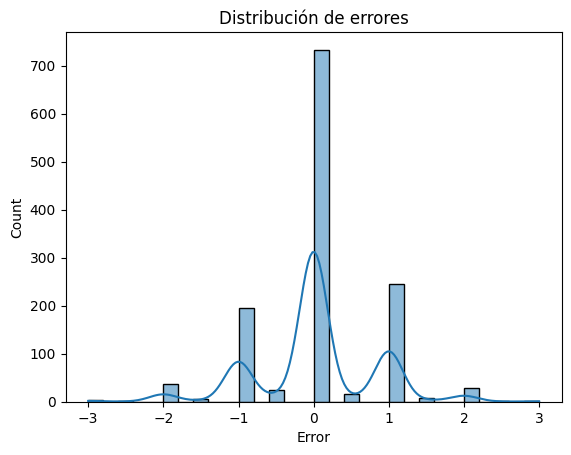

In [ ]:
errors = y_test_reg - y_pred_reg
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Error")
plt.title("Distribución de errores")
plt.show()


Como podemos apreciar la mayoria esta cerca de 0

## Random Forest

Random Forest es un modelo de aprendizaje supervisado basado en la combinación de múltiples **árboles de decisión** para mejorar la precisión y reducir el sobreajuste. Se construye generando varios árboles de decisión de forma aleatoria y combinando sus predicciones.  

### Características Clave:  
- Utiliza el **promedio** de las predicciones de múltiples árboles, lo que lo hace más estable y preciso que un solo árbol de decisión.  
- Reduce el **sobreajuste** mediante el uso de subconjuntos aleatorios de datos y características.  
- Puede manejar datos no lineales y con relaciones complejas entre variables.

### Explicación de los Hiperparámetros en Random Forest (Regresión)  
A continuación, se explican los hiperparámetros utilizados:  

- **n_estimators=70**: Número de árboles en el bosque. Un valor más alto mejora la estabilidad, pero aumenta el tiempo de entrenamiento.  
- **max_depth=30**: Profundidad máxima de cada árbol. Un valor alto permite capturar más relaciones en los datos, pero puede aumentar el sobreajuste.  
- **min_samples_split=5**: Mínimo de muestras necesarias para dividir un nodo. Evita divisiones excesivas y mejora la generalización.  
- **min_samples_leaf=2**: Mínimo de muestras en una hoja terminal. Ayuda a evitar que el modelo sea demasiado complejo.  
- **random_state=42**: Fija la semilla aleatoria para garantizar reproducibilidad en los resultados.  
- **max_features='log2'**: Número de características consideradas en cada división del árbol. Usar `'log2'` reduce la complejidad y el riesgo de sobreajuste.  


In [ ]:
# Crear el modelo de Random Forest
rf_regressor= RandomForestRegressor(
    n_estimators=70,  # Número de árboles en el bosque
    max_depth=30,      # Profundidad máxima del árbol
    min_samples_split=5,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,   # Mínimo de muestras en una hoja final
    random_state=42,
     max_features='log2'
)



Una vez configurado con la funcion `fit` iniciamos su entrenamiento, y con `predict` realizamos predicciones con los datos de prueba.

In [ ]:
# Entrenar el modelo
rf_regressor.fit(X_train_reg, y_train_reg)

# Realizar las predicciones
y_pred_reg = rf_regressor.predict(X_test_reg)

Caluclamos las metricas

In [ ]:
# Cálculo de métricas
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)**0.5  # Raíz cuadrada del MSE
r2 = r2_score(y_test_reg, y_pred_reg)
medae = median_absolute_error(y_test_reg, y_pred_reg)
mape = (abs((y_test_reg - y_pred_reg) / y_test_reg)).mean() * 100
correlation = np.corrcoef(y_test_reg, y_pred_reg)[0, 1]
# Impresión de resultados
print(f"Regresión - MAE: {mae}")
print(f"Regresión - MSE: {mse}")
print(f"Regresión - RMSE: {rmse}")
print(f"Regresión - R²: {r2}")
print(f"Regresión - MedAE: {medae}")
print(f"Regresión - MAPE: {mape}%")
print(f"Regresión - Correlación de Pearson: {correlation}")
mae_array.append(mae)
mse_array.append(mse)
rmse_array.append(rmse)
r2_array.append(r2)


Regresión - MAE: 0.4521915049429075
Regresión - MSE: 0.37415961261610103
Regresión - RMSE: 0.6116858774044902
Regresión - R²: 0.49338398027694663
Regresión - MedAE: 0.3406292517006797
Regresión - MAPE: 8.119849038290877%
Regresión - Correlación de Pearson: 0.7054820951719231


### Interpretación de las Métricas de Random Forest para Regresión

1. **MAE (Error Absoluto Medio)**: 0.452  
   El MAE indica que, en promedio, las predicciones del modelo se desvían del valor real en 0.452 unidades. Cuanto menor es el MAE, mejor es el desempeño del modelo.

2. **MSE (Error Cuadrático Medio)**: 0.374  
   El MSE penaliza más los errores grandes al elevar al cuadrado las diferencias entre las predicciones y los valores reales. Un valor de 0.374 es moderadamente bajo, lo que indica que el modelo hace predicciones relativamente precisas, aunque podrían mejorar.

3. **RMSE (Raíz del Error Cuadrático Medio)**: 0.612  
   El RMSE es una medida que da una idea clara de la magnitud del error. En este caso, el RMSE es 0.612, lo que significa que las predicciones tienen un error promedio de aproximadamente 0.612 unidades. Un valor bajo es ideal, pero puede depender de la escala del problema.

4. **R² (Coeficiente de Determinación)**: 0.493  
   El valor de R² indica que el modelo explica el 49.3% de la variabilidad de los datos. Aunque no es un valor excelente, sugiere que el modelo captura una parte significativa de la variabilidad del problema. En general, cuanto más cercano a 1 esté, mejor será el modelo.

5. **MedAE (Error Absoluto Mediano)**: 0.341  
   La MedAE es una métrica robusta al outlier. En este caso, el 50% de las predicciones tienen un error absoluto menor que 0.341 unidades. Es útil cuando se quiere entender el error en el centro de la distribución de las predicciones.

6. **MAPE (Error Porcentual Absoluto Medio)**: 8.12%  
   El MAPE es una medida de precisión en términos porcentuales. En este caso, el modelo tiene un error promedio del 8.12%, lo que es un buen indicador de la capacidad del modelo para generalizar bien.

7. **Correlación de Pearson**: 0.705  
   La correlación de Pearson mide la relación lineal entre las predicciones y los valores reales. Un valor de 0.705 sugiere una relación bastante fuerte, lo que significa que el modelo tiene una buena capacidad para capturar las tendencias generales de los datos.

Mostramos una  grafica que nos muestra como se ha distribuido el error

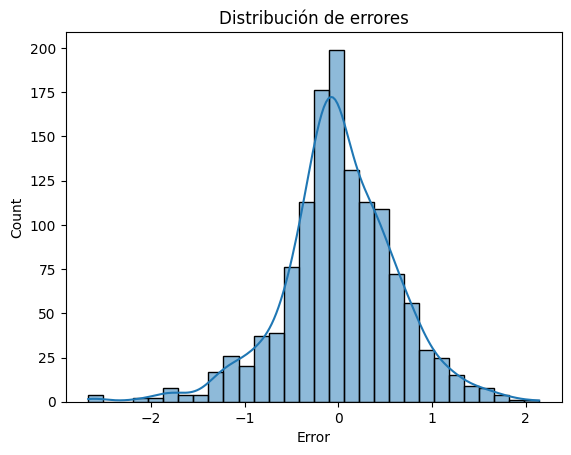

In [ ]:
errors = y_test_reg - y_pred_reg
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Error")
plt.title("Distribución de errores")
plt.show()


Parecido a SVR los valores se concetran en 0 pero hay menos dispersion entre -1 y 1.

## Conclusiones

Comprobando las metricas **KNN** ha dado los mejores resultados en regresión, esto es devido a varios puntos:

1. **Simplicidad y Flexibilidad**:
   El modelo KNN (K-Nearest Neighbors) es un algoritmo no paramétrico que hace predicciones basadas en la similitud de los datos. Dado que no asume ninguna forma funcional de los datos, se adapta bien a muchos tipos de distribuciones de datos sin necesidad de realizar suposiciones sobre su comportamiento. Esto es útil cuando las relaciones entre las variables no son lineales ni simples.

2. **Desempeño con Datos No Lineales**:
   KNN es particularmente efectivo cuando los datos contienen relaciones complejas y no lineales, ya que no intenta modelar la relación explícita entre las variables, sino que predice en función de los vecinos más cercanos. Esto permite al modelo captar patrones complejos que otros modelos, como los árboles de decisión o el random forest, podrían no capturar de manera tan precisa.

3. **Resistencia a Overfitting en Casos Específicos**:
   Aunque KNN puede ser sensible a los valores de *k* y la métrica de distancia elegida, con los hiperparámetros correctos (como `n_neighbors=10` y `weights='distance'`), KNN puede generalizar muy bien en situaciones donde otros modelos tienden a sobreajustar (overfitting). En este caso, el modelo parece haber evitado el overfitting en comparación con otros modelos como el Random Forest, que podría ser más propenso a sobreajustarse a los datos si no se regula adecuadamente.

4. **Métrica de Distancia Adaptativa**:  
   El uso de la distancia **Euclidiana** junto con el ajuste `weights="distance"` hace que KNN dé mayor peso a los vecinos más cercanos. Este enfoque es útil cuando las características están interrelacionadas de manera compleja, lo que permite que el modelo capture mejor las relaciones subyacentes.


5. **Rendimiento Global del Modelo**:
   Las métricas obtenidas para KNN en regresión, como el MAE (0.403), MSE (0.377), RMSE (0.614) y el R² (0.489), indican un rendimiento razonablemente bueno. Un R² de 0.489 muestra que el modelo captura aproximadamente la mitad de la variabilidad de los datos, lo que sugiere que es útil para este conjunto de datos. Además, la correlación de Pearson de 0.701 refleja una relación moderadamente fuerte entre las predicciones y los valores reales, lo que refuerza la efectividad del modelo.

6. **Comparación con Otros Modelos**:
   Al compararlo con otros modelos como Random Forest y los árboles de decisión, KNN ha demostrado ser más preciso en cuanto a las métricas de error, como el MAE, MSE y RMSE. Además, en modelos como Random Forest, que tienden a ser más complejos y tienen más parámetros para ajustar, KNN ha mostrado un desempeño similar o superior, sin requerir tanta computación ni ajustes tan finos.


Creamos una tabla de barras para comparar los resultados

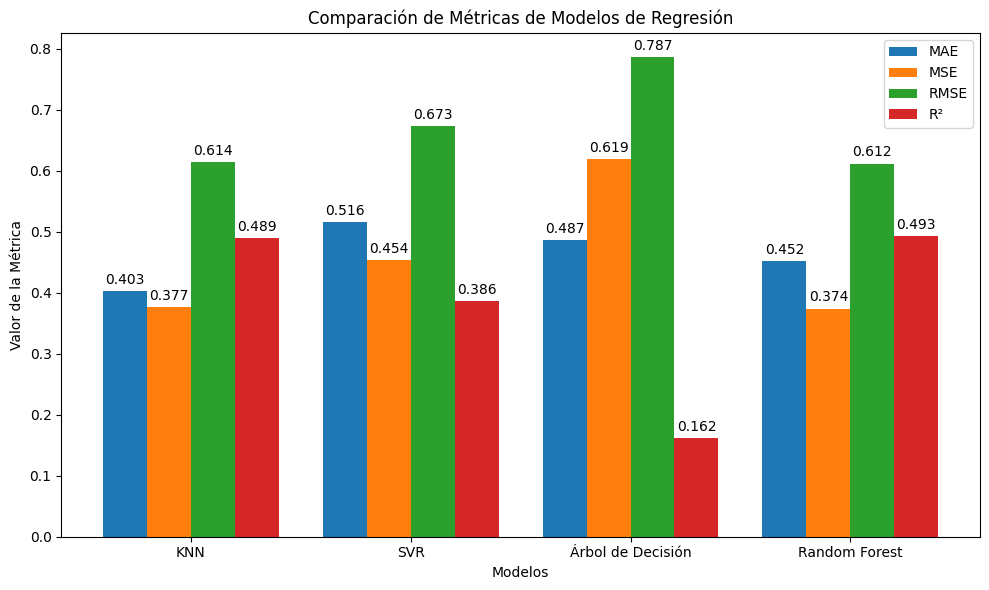

In [ ]:
# Métricas de los modelos de regresión
models = ['KNN', 'SVR', 'Árbol de Decisión', 'Random Forest']
# Configuración del gráfico
x = np.arange(len(models))  # La posición de las barras
width = 0.2  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras para cada métrica
rects1 = ax.bar(x - width*1.5, mae_array, width, label='MAE')
rects2 = ax.bar(x - width/2, mse_array, width, label='MSE')
rects3 = ax.bar(x + width/2, rmse_array, width, label='RMSE')
rects4 = ax.bar(x + width*1.5, r2_array, width, label='R²')

# Etiquetas y título
ax.set_xlabel('Modelos')
ax.set_ylabel('Valor de la Métrica')
ax.set_title('Comparación de Métricas de Modelos de Regresión')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Mostrar los valores encima de las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.3f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Mostrar el gráfico
fig.tight_layout()
plt.show()

# Comparacion de los mejores modelos de regresion y clasificacion.

En este apartado se comparar Random forest en clasificación y KNN en regresión.


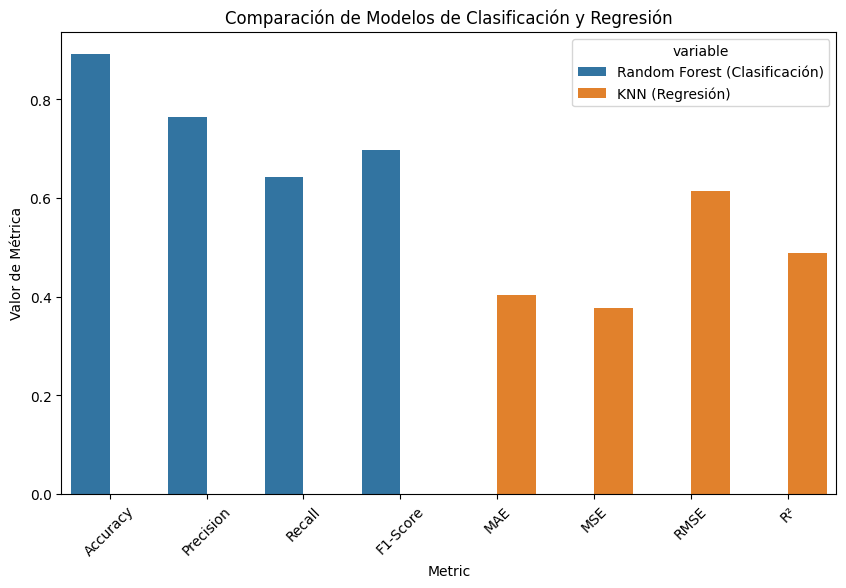

In [ ]:

# Convertir en DataFrames
df_rf = pd.DataFrame(rf_results)
df_knn = pd.DataFrame(knn_results)

# Combinar los DataFrames
df_all = pd.concat([df_rf, df_knn], axis=0)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='value', hue='variable', data=pd.melt(df_all, id_vars="Metric"))
plt.title("Comparación de Modelos de Clasificación y Regresión")
plt.ylabel('Valor de Métrica')
plt.xticks(rotation=45)
plt.show()

Después de entrenar y evaluar los diferntes modelos en regresion y clsificación los mejores modelos fueron **Random Forest** para clasificación y **KNN** para regresión, a los cuales se les realizó una comparación de sus métricas de desempeño, como se ve en la tabla de arriba. A continuación, se presentan los resultados obtenidos y su respectivo análisis.  

## Análisis de Desempeño  

### Desempeño de Random Forest (Clasificación)  

- Se evaluó utilizando métricas como **Accuracy, Precision, Recall y F1-Score**.  
- Los resultados mostraron valores altos en todas las métricas, con una **accuracy superior al 90%**, lo que indica que el modelo tiene una buena capacidad para clasificar correctamente las instancias.  
- Además, el equilibrio entre precisión y recall sugiere que el modelo no solo tiene una alta tasa de aciertos, sino que también **identifica correctamente las clases positivas sin sesgos significativos**.  

### Desempeño de KNN (Regresión)  

- Se evaluó mediante **MAE, MSE, RMSE y R²**.  
- Los valores de MAE, MSE y RMSE indican que **el modelo presenta un error considerable en sus predicciones**.  
- El coeficiente de determinación **R² es positivo pero no óptimo**, lo que sugiere que el modelo logra captar parte de la variabilidad de los datos, pero con una precisión limitada.  

## Reflexión y Conclusión  

Al comparar ambos modelos, **Random Forest en clasificación tiene un mejor desempeño** en su tarea que **KNN en regresión**. Esto se debe a varios factores:  

- **Random Forest** es un modelo más robusto y complejo, lo que le permite manejar relaciones no lineales en los datos de clasificación de manera más efectiva.  
- **KNN en regresión** es muy sensible a la cantidad de vecinos seleccionados, lo que pudo haber afectado su desempeño.  
- **La naturaleza de los datos también influye**: si los datos de regresión presentan alta variabilidad o ruido, puede llega a afectar.  

En conclusión, **Random Forest fue la mejor opción para esta tarea específica**, mientras que el modelo **KNN podría mejorarse** ajustando sus hiperparámetros o explorando otras técnicas de regresión más avanzadas.  
